# Version Control
Check and display versions for future reproduction and debugging purposes

In [1]:
import pandas as pd
import sklearn
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.6.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 61 Stepping 4, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.23.4
pytest: 3.8.2
pip: 10.0.1
setuptools: 40.4.3
Cython: 0.28.5
numpy: 1.15.2
scipy: 1.1.0
pyarrow: None
xarray: None
IPython: 7.0.1
sphinx: 1.8.1
patsy: 0.5.0
dateutil: 2.7.3
pytz: 2018.5
blosc: None
bottleneck: 1.2.1
tables: 3.4.4
numexpr: 2.6.8
feather: None
matplotlib: 2.2.2
openpyxl: 2.5.8
xlrd: 1.1.0
xlwt: 1.3.0
xlsxwriter: 1.1.1
lxml: 4.2.5
bs4: 4.6.3
html5lib: 1.0.1
sqlalchemy: 1.2.11
pymysql: None
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: 0.7.0


In [2]:
raw_df = pd.read_csv('data/crimedata.csv')
df = raw_df.replace('?',np.nan)
df.tail()

,Ecommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
2210,Mercedcity,CA,NaN,NaN,10,56216,3.07,6.87,61.68,15.23,...,1376,2268.72,2563,4225.82,489,806.25,34,56.06,545.75,7356.84
2211,Pinevillecity,LA,NaN,NaN,10,12251,2.68,21.18,76.65,1.52,...,104,860.43,574,4748.9,24,198.56,2,16.55,124.1,5824.44
2212,Yucaipacity,CA,NaN,NaN,10,32824,2.46,0.52,92.62,0.98,...,628,1709.26,895,2435.97,179,487.19,8,21.77,353.83,4654.2
2213,Beevillecity,TX,NaN,NaN,10,13547,2.89,3.37,69.91,0.90,...,192,1508.01,474,3722.9,13,102.1,1,7.85,691.17,5340.87
2214,WestSacramentocity,CA,NaN,NaN,10,28898,2.61,2.39,71.27,9.09,...,791,2614.53,1458,4819.2,405,1338.67,20,66.11,918.89,8838.5


In [3]:
print(df.groupby('Ecommunityname')['Ecommunityname'].count())

Ecommunityname
Aberdeencity          2
Aberdeentown          1
Aberdeentownship      1
Adacity               1
Adriancity            1
AgouraHillscity       1
Aikencity             1
Akroncity             1
Alabastercity         1
Alamedacity           1
Alamogordocity        1
Albanycity            4
Albemarlecity         1
AlbertLeacity         1
Albioncity            1
Albuquerquecity       1
AlexanderCitycity     1
Alexandriacity        2
Algonquinvillage      1
Alhambracity          1
Alicecity             1
AllenParkcity         1
Allencity             1
Allentowncity         1
Alliancecity          1
Alpenacity            1
Alpharettacity        1
Altoonacity           1
Altuscity             1
Alvincity             1
                     ..
Woburncity            1
Wolcotttown           1
Woodbridgetownship    1
Woodburncity          1
Woodburycity          2
Woodhavencity         1
Woodlandcity          1
Woodwardcity          1
Woonsocketcity        1
Woostercity           1
W

In [4]:
df.groupby('state')['state'].count()

state
AK      3
AL     43
AR     25
AZ     20
CA    279
CO     25
CT     71
DC      1
DE      1
FL     90
GA     37
IA     20
ID      7
IL     40
IN     48
KS      1
KY     26
LA     22
MA    123
MD     12
ME     17
MI    108
MN     66
MO     42
MS     20
NC     46
ND      8
NH     21
NJ    211
NM     10
NV      5
NY     46
OH    111
OK     36
OR     31
PA    101
RI     26
SC     28
SD      9
TN     35
TX    162
UT     24
VA     33
VT      4
WA     40
WI     60
WV     14
WY      7
Name: state, dtype: int64

# Explore Variables

- 147 features exist, both predictive features and features to be predicted
- 2215 observations exist
- Some features already have missing values

Let's take a further analysis into some of the missing values

# TODO: Find outliers and ELIMINATE THEM
- new york city, los angelos, and chicago

In [5]:
for col in df.columns:
    print(col+': '+str(df[col].count()))

Ecommunityname: 2215
state: 2215
countyCode: 994
communityCode: 991
fold: 2215
population: 2215
householdsize: 2215
racepctblack: 2215
racePctWhite: 2215
racePctAsian: 2215
racePctHisp: 2215
agePct12t21: 2215
agePct12t29: 2215
agePct16t24: 2215
agePct65up: 2215
numbUrban: 2215
pctUrban: 2215
medIncome: 2215
pctWWage: 2215
pctWFarmSelf: 2215
pctWInvInc: 2215
pctWSocSec: 2215
pctWPubAsst: 2215
pctWRetire: 2215
medFamInc: 2215
perCapInc: 2215
whitePerCap: 2215
blackPerCap: 2215
indianPerCap: 2215
AsianPerCap: 2215
OtherPerCap: 2214
HispPerCap: 2215
NumUnderPov: 2215
PctPopUnderPov: 2215
PctLess9thGrade: 2215
PctNotHSGrad: 2215
PctBSorMore: 2215
PctUnemployed: 2215
PctEmploy: 2215
PctEmplManu: 2215
PctEmplProfServ: 2215
PctOccupManu: 2215
PctOccupMgmtProf: 2215
MalePctDivorce: 2215
MalePctNevMarr: 2215
FemalePctDiv: 2215
TotalPctDiv: 2215
PersPerFam: 2215
PctFam2Par: 2215
PctKids2Par: 2215
PctYoungKids2Par: 2215
PctTeen2Par: 2215
PctWorkMomYoungKids: 2215
PctWorkMom: 2215
NumKidsBornNeverM

# drop any missing observations from y and its corresponding X
subset_df = df.loc[df['ViolentCrimesPerPop'].isnull() == False, ['ViolentCrimesPerPop','population']]

x = subset_df['population']
y = subset_df['ViolentCrimesPerPop']

plt.ylabel('Violent Crimes per Population')
plt.xlabel('Population')
plt.title('Linear Model Accuracies')

plt.scatter(x, y, alpha=0.3)

#plt.show()

In [6]:
# drop columns with less than ~25% of observations
for col in df.columns:
    if df[col].count() < 500:
        del df[col]
        
index = df[df['Ecommunityname']=='NewYorkcity'].head(1).index
df.drop(index)
index = df[df['Ecommunityname']=='Chicagocity'].head(1).index
df.drop(index)
index = df[df['Ecommunityname']=='LosAngelescity'].head(1).index
df.drop(index)
        
# ignore columns with datatype of string      
# or any column with no predictive power
del df['Ecommunityname']
del df['state']
del df['countyCode']
del df['communityCode']
del df['fold']
del df['OtherPerCap']

# ignore features to predict for future reference
del df['rapes']
del df['rapesPerPop']
del df['robberies']
del df['robbbPerPop']
del df['assaults']
del df['assaultPerPop']
del df['burglaries']
del df['burglPerPop']
del df['larcenies']
del df['larcPerPop']
del df['autoTheft']
del df['autoTheftPerPop']
del df['arsons']
del df['arsonsPerPop']
del df['nonViolPerPop']
del df['murders']
del df['murdPerPop']

df.to_csv('data/processed_crimedata.csv')

# for now, we will just look at violent crimes
# drop any missing observations from y and its corresponding X
df = df[df['ViolentCrimesPerPop'].isnull() == False]
y = df['ViolentCrimesPerPop']
del df['ViolentCrimesPerPop']

print('Features remaining: '+str(len(df.columns)))
print(df.shape) 

Features remaining: 101
(1994, 101)


In [7]:
print('(rows, columns (predictors))')
print(df.shape) 
print('Violent Crimes per population: ')
print(y.describe())
print('Population')
print(df['population'].describe())

(rows, columns (predictors))
(1994, 101)
Violent Crimes per population: 
count       1994
unique      1973
top       223.06
freq           3
Name: ViolentCrimesPerPop, dtype: object
Population
count    1.994000e+03
mean     5.225143e+04
std      2.021475e+05
min      1.000500e+04
25%      1.435925e+04
50%      2.268100e+04
75%      4.315375e+04
max      7.322564e+06
Name: population, dtype: float64


## Organize Feature Groups

Despite eliminating a few features, there still exists more features than is 
necessary for analysis.

Let's eliminate more features by first selecting the most predictive features. 

More feature groups will be created based on the top features, as well
as the top features mentioned by the paper.

In [8]:
all_features = df.columns

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction via chi squared test
test = SelectKBest(score_func=chi2, k=30)
fit = test.fit(df, y)

# organize top features into a list
d = dict(zip(df.columns, fit.scores_))
top_features = sorted(d, key=d.__getitem__, reverse=True)[0:30]
print(top_features)

['numbUrban', 'population', 'NumImmig', 'NumUnderPov', 'NumKidsBornNeverMar', 'OwnOccHiQuart', 'OwnOccMedVal', 'OwnOccLowQuart', 'OwnOccQrange', 'HousVacant', 'indianPerCap', 'blackPerCap', 'AsianPerCap', 'medIncome', 'medFamInc', 'NumInShelters', 'NumStreet', 'HispPerCap', 'PopDens', 'perCapInc', 'whitePerCap', 'LandArea', 'RentHighQ', 'RentMedian', 'RentLowQ', 'MedRent', 'RentQrange', 'pctUrban', 'racePctHisp', 'racepctblack']


In [10]:
df[top_features].describe(include='all')

,numbUrban,population,NumImmig,NumUnderPov,NumKidsBornNeverMar,OwnOccHiQuart,OwnOccMedVal,OwnOccLowQuart,OwnOccQrange,HousVacant,...,whitePerCap,LandArea,RentHighQ,RentMedian,RentLowQ,MedRent,RentQrange,pctUrban,racePctHisp,racepctblack
count,1.994000e+03,1.994000e+03,1.994000e+03,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,4.667176e+04,5.225143e+04,6.313566e+03,7.398380e+03,2041.450351,149007.191575,116102.414243,91116.201103,57890.990471,1733.037111,...,16535.021063,27.962889,528.368104,428.447844,328.062688,502.730191,200.305416,69.621545,8.481610,9.509694
std,2.031508e+05,2.021475e+05,5.708065e+04,3.793092e+04,14021.347701,101124.665073,83971.437925,68581.851565,39527.424643,5890.906929,...,6311.111286,114.827752,203.360888,174.548134,146.381388,172.522021,86.724596,44.478865,15.208788,14.101979
min,0.000000e+00,1.000500e+04,2.000000e+01,7.800000e+01,0.000000,36700.000000,26600.000000,15700.000000,0.000000,36.000000,...,5472.000000,0.900000,182.000000,120.000000,99.000000,192.000000,0.000000,0.000000,0.120000,0.000000
25%,0.000000e+00,1.435925e+04,4.070000e+02,9.362500e+02,146.250000,74800.000000,56700.000000,41800.000000,32925.000000,310.000000,...,12596.000000,7.400000,361.250000,286.000000,210.000000,363.000000,139.000000,0.000000,0.920000,0.940000
50%,1.734850e+04,2.268100e+04,1.039500e+03,2.217500e+03,361.000000,109500.000000,84600.000000,65900.000000,44250.000000,582.500000,...,15027.500000,13.700000,484.000000,394.000000,305.000000,467.000000,173.000000,100.000000,2.340000,3.150000
75%,4.193150e+04,4.315375e+04,3.389250e+03,5.097500e+03,1070.250000,192850.000000,156250.000000,126800.000000,67475.000000,1280.500000,...,18609.750000,25.775000,667.750000,547.750000,420.000000,621.000000,241.000000,100.000000,8.610000,11.965000
max,7.322564e+06,7.322564e+06,2.082931e+06,1.384994e+06,527557.000000,500001.000000,500001.000000,500001.000000,331000.000000,172768.000000,...,68850.000000,3569.800000,1001.000000,1001.000000,1001.000000,1001.000000,803.000000,100.000000,95.290000,96.670000


In [11]:
# exclude potentially discriminating features
biased_features = ['NumImmig','indianPerCap','blackPerCap','AsianPerCap',
                   'HispPerCap','whitePerCap','racePctHisp','racepctblack']
unbiased_top_features = [feature for feature in top_features if feature not in biased_features]

print(unbiased_top_features)

['numbUrban', 'population', 'NumUnderPov', 'NumKidsBornNeverMar', 'OwnOccHiQuart', 'OwnOccMedVal', 'OwnOccLowQuart', 'OwnOccQrange', 'HousVacant', 'medIncome', 'medFamInc', 'NumInShelters', 'NumStreet', 'PopDens', 'perCapInc', 'LandArea', 'RentHighQ', 'RentMedian', 'RentLowQ', 'MedRent', 'RentQrange', 'pctUrban']


In [12]:
df[unbiased_top_features].describe(include='all')

,numbUrban,population,NumUnderPov,NumKidsBornNeverMar,OwnOccHiQuart,OwnOccMedVal,OwnOccLowQuart,OwnOccQrange,HousVacant,medIncome,...,NumStreet,PopDens,perCapInc,LandArea,RentHighQ,RentMedian,RentLowQ,MedRent,RentQrange,pctUrban
count,1.994000e+03,1.994000e+03,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,4.667176e+04,5.225143e+04,7.398380e+03,2041.450351,149007.191575,116102.414243,91116.201103,57890.990471,1733.037111,33699.327482,...,18.712136,2789.862487,15521.723170,27.962889,528.368104,428.447844,328.062688,502.730191,200.305416,69.621545
std,2.031508e+05,2.021475e+05,3.793092e+04,14021.347701,101124.665073,83971.437925,68581.851565,39527.424643,5890.906929,13391.741380,...,256.203872,2920.185784,6227.115252,114.827752,203.360888,174.548134,146.381388,172.522021,86.724596,44.478865
min,0.000000e+00,1.000500e+04,7.800000e+01,0.000000,36700.000000,26600.000000,15700.000000,0.000000,36.000000,11576.000000,...,0.000000,10.000000,5237.000000,0.900000,182.000000,120.000000,99.000000,192.000000,0.000000,0.000000
25%,0.000000e+00,1.435925e+04,9.362500e+02,146.250000,74800.000000,56700.000000,41800.000000,32925.000000,310.000000,23597.000000,...,0.000000,1170.825000,11548.250000,7.400000,361.250000,286.000000,210.000000,363.000000,139.000000,0.000000
50%,1.734850e+04,2.268100e+04,2.217500e+03,361.000000,109500.000000,84600.000000,65900.000000,44250.000000,582.500000,30896.000000,...,0.000000,1996.100000,13977.000000,13.700000,484.000000,394.000000,305.000000,467.000000,173.000000,100.000000
75%,4.193150e+04,4.315375e+04,5.097500e+03,1070.250000,192850.000000,156250.000000,126800.000000,67475.000000,1280.500000,41214.750000,...,1.000000,3270.400000,17774.500000,25.775000,667.750000,547.750000,420.000000,621.000000,241.000000,100.000000
max,7.322564e+06,7.322564e+06,1.384994e+06,527557.000000,500001.000000,500001.000000,500001.000000,331000.000000,172768.000000,123625.000000,...,10447.000000,44229.900000,63302.000000,3569.800000,1001.000000,1001.000000,1001.000000,1001.000000,803.000000,100.000000


In [13]:
# top features according to paper
# population, density, unemployment rate, poverty rate
paper_features = ['population','PopDens','PctUnemployed','PctPopUnderPov']
print(paper_features)

['population', 'PopDens', 'PctUnemployed', 'PctPopUnderPov']


In [14]:
df[paper_features].describe(include='all')

,population,PopDens,PctUnemployed,PctPopUnderPov
count,1.994000e+03,1994.000000,1994.000000,1994.000000
mean,5.225143e+04,2789.862487,6.023862,11.795933
std,2.021475e+05,2920.185784,2.725405,8.509501
min,1.000500e+04,10.000000,1.320000,0.640000
25%,1.435925e+04,1170.825000,4.090000,4.692500
50%,2.268100e+04,1996.100000,5.485000,9.650000
75%,4.315375e+04,3270.400000,7.430000,17.077500
max,7.322564e+06,44229.900000,23.830000,48.820000


# Explore Distributions of Features

- can be helpful to determine whether scaling or normalization is crucial to final output
- technical bias could emerge as the result of not paying attention to the distribution of variables

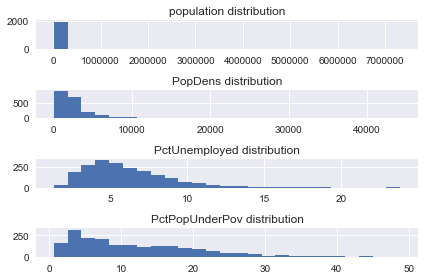

In [15]:
fig, ax = plt.subplots(len(paper_features))
for index, col in enumerate(paper_features):
    data = pd.Series(df[col])
    ax[index].hist(data, bins=25)
    ax[index].set_title(str(col)+' distribution')
fig.tight_layout()
plt.show()

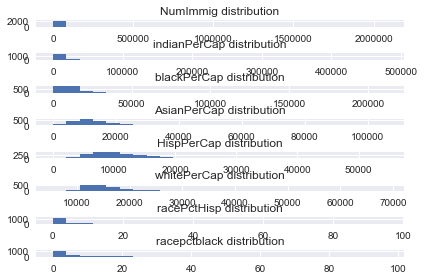

In [16]:
fig, ax = plt.subplots(len(biased_features))
for index, col in enumerate(biased_features):
    data = pd.Series(df[col])
    ax[index].hist(data, bins=25)
    ax[index].set_title(str(col)+' distribution')
fig.tight_layout()
plt.subplots_adjust(hspace=4)
plt.show()

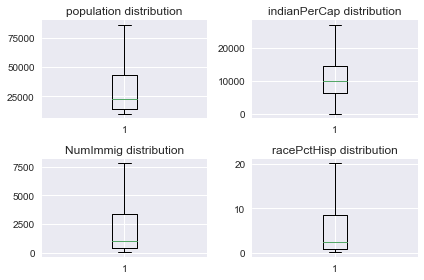

In [17]:
features_of_interest = ['population','NumImmig','indianPerCap','racePctHisp']

fig, ax = plt.subplots(2,2)
for index, col in enumerate(features_of_interest):
    if index < 2:
        row = 0
    else:
        row = 1
    data = pd.Series(df[col])
    ax[index%2,row].boxplot(data, showfliers=False)
    ax[index%2,row].set_title(str(col)+' distribution')
fig.tight_layout()
plt.show()

- features of interest or population, indians per capita, number of immigrants, and percentage of hispanics had outliers which skewed their distributions
- features have varying length of min's and max's
- it may be advantageous to scale features 

# Prediction vs Bias
- Using the feature groups, we can explore how accuracy can vary 
from one group of features to the next
- Considering some feature groups have more biased features than others,
we can determine how acccuracy varies with bias

## Method 1
- Use feature groups selected via chi-squared tests and protected classes
- Downside: Some features may be highly correlated with biased features

In [18]:
feature_groups = {'all_features':all_features,'top_features':top_features,'unbiased_top_features':unbiased_top_features,
                 'paper_features':paper_features}

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm_accuracies = []

print('   Linear Model   ')
print('------------------')

for name, feature_group in feature_groups.items():
    X = preprocessing.normalize(df[feature_group])
    print(name)
    scores = cross_val_score(lm, X, y, cv=5)
    print('  Acc: '+str(scores.mean()))
    lm_accuracies.append(scores.mean())

   Linear Model   
------------------
all_features
  Acc: 0.5934305448872307
top_features
  Acc: 0.5689052636728599
unbiased_top_features
  Acc: 0.5225119401626032
paper_features
  Acc: 0.05503070182134458


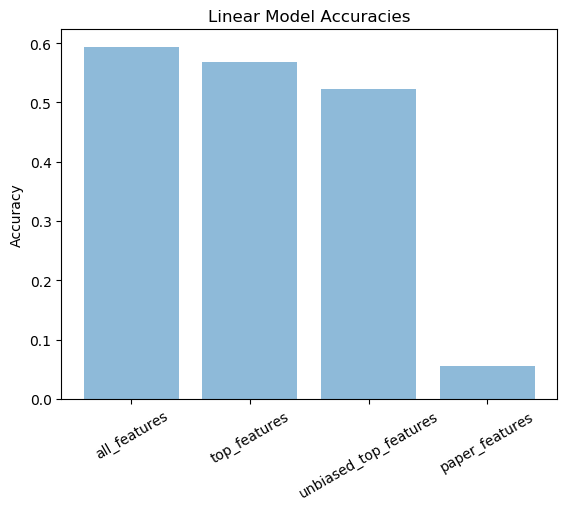

In [20]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
features = ('all_features', 'top_features', 'unbiased_top_features', 'paper_features')
y_pos = np.arange(len(features))
 
plt.bar(y_pos, lm_accuracies, align='center', alpha=0.5)
plt.xticks(y_pos, features)
plt.ylabel('Accuracy')
plt.title('Linear Model Accuracies')
plt.xticks(rotation=30)
 
plt.show()

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

svm = svm.LinearSVR()
svm_accuracies = []

print('   Support Vector Machine   ')
print('----------------------------')

for name, feature_group in feature_groups.items():
    X = df[feature_group]
    print(name)
    scores = cross_val_score(svm, X, y, cv=5)
    print('  Mse: '+str(abs(scores).mean()))
    svm_accuracies.append(abs(scores).mean())

   Support Vector Machine   
----------------------------
all_features
  Mse: 1.0927197505425046
top_features
  Mse: 2.1256946078208054
unbiased_top_features
  Mse: 12.301411486927186
paper_features
  Mse: 199.8216455571465


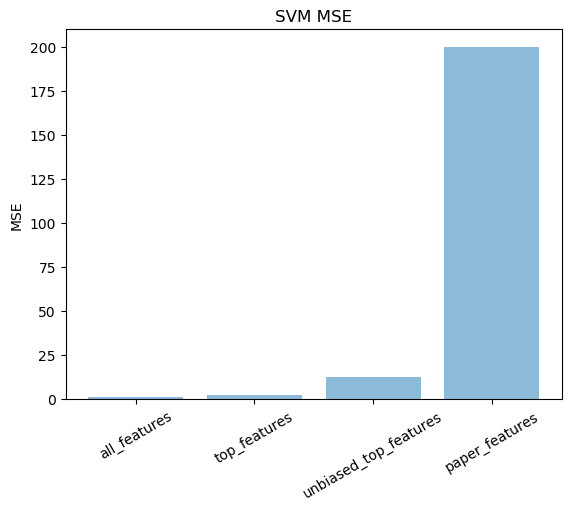

In [22]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
features = ('all_features', 'top_features', 'unbiased_top_features', 'paper_features')
y_pos = np.arange(len(features))
 
plt.bar(y_pos, svm_accuracies, align='center', alpha=0.5)
plt.xticks(y_pos, features)
plt.ylabel('MSE')
plt.title('SVM MSE')
plt.xticks(rotation=30)
 
plt.show()

In [23]:
y = y.astype('float')
print(y.mean())
print(y.max())
print(y.min())
print(len(y))
print(len(X))

589.0789217652964
4877.06
0.0
1994
1994


## Method 2
- 1) Organize features according to their worst correlation to protected features
- 2) Make feature groups based on a rising threshold of worst correlation
- 3) Model and plot the accuracies of these feature groups

In [24]:
# age, color, disability, genetic information, military status, 
#national origin, race, religion, sex, and veteran status
protected_features = [
 'racepctblack','racePctWhite','racePctAsian','racePctHisp',
 'agePct12t21','agePct12t29','agePct16t24','agePct65up',
 'whitePerCap','blackPerCap','indianPerCap','AsianPerCap',
 'HispPerCap','NumImmig','PctImmigRecent','PctImmigRec5',
 'PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5',
 'PctRecImmig8','PctRecImmig10'
]

non_protected_features = [feature for feature in all_features if feature not in protected_features]

feature_correlations = {}

for col in non_protected_features:
    correlations = df[protected_features].corrwith(df[col])
    worst_correlations = max(abs(correlations))
    feature_correlations[col] = worst_correlations
    

print(feature_correlations)

{'population': 0.9369854402571764, 'householdsize': 0.5772702004230617, 'numbUrban': 0.934869920449747, 'pctUrban': 0.3190949173093882, 'medIncome': 0.8398830772062763, 'pctWWage': 0.8393060571436367, 'pctWFarmSelf': 0.23086889053166834, 'pctWInvInc': 0.6918041002940871, 'pctWSocSec': 0.9338373004149652, 'pctWPubAsst': 0.5855140843588401, 'pctWRetire': 0.6717378689485515, 'medFamInc': 0.8852702255747001, 'perCapInc': 0.9755816109375214, 'NumUnderPov': 0.9304930803018888, 'PctPopUnderPov': 0.5447886160002082, 'PctLess9thGrade': 0.6399915633677958, 'PctNotHSGrad': 0.5892721601639179, 'PctBSorMore': 0.7643398423430514, 'PctUnemployed': 0.5261843269816555, 'PctEmploy': 0.6195778528785288, 'PctEmplManu': 0.1802556273537191, 'PctEmplProfServ': 0.451488708186301, 'PctOccupManu': 0.632213644713215, 'PctOccupMgmtProf': 0.8043065406123521, 'MalePctDivorce': 0.39593650688562954, 'MalePctNevMarr': 0.8002861641318053, 'FemalePctDiv': 0.4445172589520995, 'TotalPctDiv': 0.42735924254337837, 'PersPerF

In [25]:
features_correlation_thresholds = {}

for x in range(3,20):
    x = x*5/100
    features_correlation_thresholds[x] = [col for col in feature_correlations\
           if feature_correlations[col] < x]
    print('<'+str(x))
    print(features_correlation_thresholds[x])

<0.15
['LandArea']
<0.2
['PctEmplManu', 'LandArea']
<0.25
['pctWFarmSelf', 'PctEmplManu', 'MedOwnCostPctIncNoMtg', 'LandArea']
<0.3
['pctWFarmSelf', 'PctEmplManu', 'PctWorkMomYoungKids', 'MedOwnCostPctIncNoMtg', 'LandArea', 'LemasPctOfficDrugUn']
<0.35
['pctUrban', 'pctWFarmSelf', 'PctEmplManu', 'PctWorkMomYoungKids', 'PctHousOccup', 'PctVacMore6Mos', 'MedOwnCostPctIncNoMtg', 'PctSameState85', 'LandArea', 'LemasPctOfficDrugUn']
<0.4
['pctUrban', 'pctWFarmSelf', 'PctEmplManu', 'MalePctDivorce', 'PctWorkMomYoungKids', 'MedNumBR', 'PctHousOccup', 'PctVacMore6Mos', 'MedYrHousBuilt', 'MedRentPctHousInc', 'MedOwnCostPctIncNoMtg', 'PctSameState85', 'LandArea', 'PctUsePubTrans', 'LemasPctOfficDrugUn']
<0.45
['pctUrban', 'pctWFarmSelf', 'PctEmplManu', 'MalePctDivorce', 'FemalePctDiv', 'TotalPctDiv', 'PctWorkMomYoungKids', 'PctWorkMom', 'PctHousLess3BR', 'MedNumBR', 'PctHousOccup', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctWOFullPlumb', 'MedRentPctHousInc', 'MedOwnCostPctIncNoMtg', 'PctSameState85

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm_accuracies = {}
rmse_lm_accuracies = {}

for name, feature_group in features_correlation_thresholds.items():
    X = preprocessing.normalize(df[feature_group])
    scores = cross_val_score(lm, X, y, cv=5)
    rmse_scores = cross_val_score(lm, X, y, cv=5, scoring = 'neg_mean_squared_error')
    lm_accuracies[name] = scores.mean()
    rmse_lm_accuracies[name] = rmse_scores.mean()
    
bias_accuracy_tradeoff = {'Correlation to biased features':list(lm_accuracies.keys()),
                          'Accuracy of feature group':list(lm_accuracies.values())}
bias_accuracy_tradeoff = pd.DataFrame.from_dict(bias_accuracy_tradeoff)
#bias_accuracy_tradeoff
rmse_bias_accuracy_tradeoff = {'Correlation to biased features':list(rmse_lm_accuracies.keys()),
                          'RMSE of feature group':list(rmse_lm_accuracies.values())}
rmse_bias_accuracy_tradeoff = pd.DataFrame.from_dict(rmse_bias_accuracy_tradeoff)
#rmse_bias_accuracy_tradeoff['RMSE of feature group'] = abs(rmse_bias_accuracy_tradeoff['RMSE of feature group'])
rmse_bias_accuracy_tradeoff

,Correlation to biased features,RMSE of feature group
0,0.15,-378275.086575
1,0.20,-361713.311440
2,0.25,-354425.420228
3,0.30,-330485.476033
4,0.35,-326106.488152
5,0.40,-226201.300601
6,0.45,-206408.013059
7,0.50,-191781.651631
8,0.55,-180094.137485
9,0.60,-173010.250978


In [27]:
import statsmodels.api as sm

correlations = rmse_bias_accuracy_tradeoff['Correlation to biased features']

X = np.sqrt(rmse_bias_accuracy_tradeoff['Correlation to biased features'])
X = sm.add_constant(X)
Y = rmse_bias_accuracy_tradeoff['RMSE of feature group']

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     RMSE of feature group   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.824
Method:                    Least Squares   F-statistic:                     75.81
Date:                   Sat, 15 Dec 2018   Prob (F-statistic):           2.99e-07
Time:                           22:13:22   Log-Likelihood:                -200.10
No. Observations:                     17   AIC:                             404.2
Df Residuals:                         15   BIC:                             405.9
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -5.235e+05   3.41e+04    -15.335      0.000   -5.96e+05   -4.51e+05
Correlation to biased features  4.008e+05    4.6e+04      8.707      0.000    3.03e+05    4.99e+05
==============================================================================
Omnibus:                        4.078   Durbin-Watson:                   0.699
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                1.939
Skew:                           0.529   Prob(JB):                        0.379
Kurtosis:                       1.727   Cond. No.                         8.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

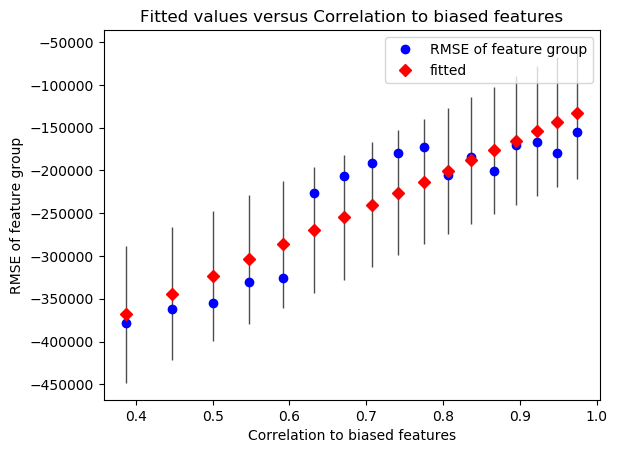

In [28]:
fig, ax = plt.subplots()
sm.graphics.plot_fit(model, 1, ax=ax)
plt.show()

In [29]:
import statsmodels.api as sm

correlations = bias_accuracy_tradeoff['Correlation to biased features']

bias_accuracy_tradeoff['Correlation to biased features ^2'] =\
    correlations*correlations
bias_accuracy_tradeoff['Correlation to biased features ^3'] =\
    correlations*correlations*correlations
X = bias_accuracy_tradeoff[['Correlation to biased features',
                            'Correlation to biased features ^2',
                            'Correlation to biased features ^3']]
X = sm.add_constant(X)
Y = bias_accuracy_tradeoff['Accuracy of feature group']

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Accuracy of feature group   R-squared:                       0.908
Model:                                   OLS   Adj. R-squared:                  0.887
Method:                        Least Squares   F-statistic:                     42.74
Date:                       Sat, 15 Dec 2018   Prob (F-statistic):           5.38e-07
Time:                               22:13:23   Log-Likelihood:                 23.108
No. Observations:                         17   AIC:                            -38.22
Df Residuals:                             13   BIC:                            -34.88
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.4372      0.186     -2.351      0.035      -0.839      -0.035
Correlation to biased features        2.7895      1.270      2.196      0.047       0.045       5.534
Correlation to biased features ^2    -2.4532      2.532     -0.969      0.350      -7.923       3.017
Correlation to biased features ^3     0.6345      1.522      0.417      0.684      -2.654       3.923
==============================================================================
Omnibus:                        1.423   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.491   Jarque-Bera (JB):                1.173
Skew:                          -0.482   Prob(JB):                        0.556
Kurtosis:                       2.147   Cond. No.                         233.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

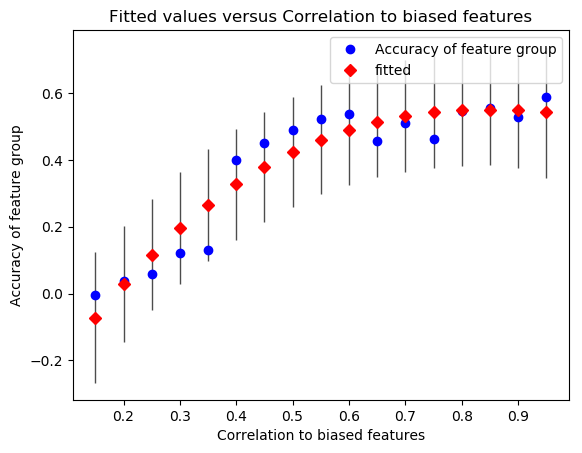

In [30]:
fig, ax = plt.subplots()
sm.graphics.plot_fit(model, 1, ax=ax)
plt.show()

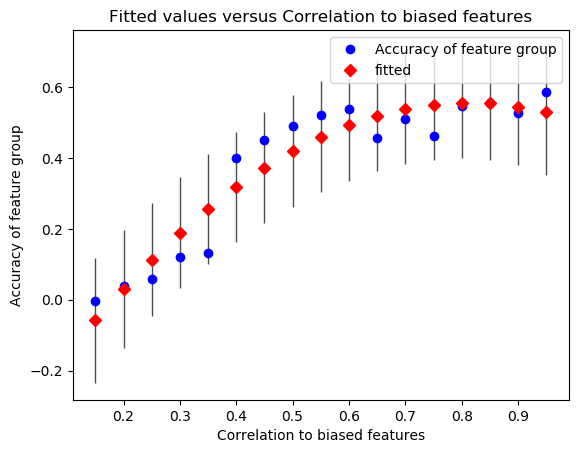

In [31]:
X = bias_accuracy_tradeoff[['Correlation to biased features',
                            'Correlation to biased features ^2']]
X = sm.add_constant(X)
Y = bias_accuracy_tradeoff['Accuracy of feature group']

model = sm.OLS(Y, X).fit()

fig, ax = plt.subplots()
sm.graphics.plot_fit(model, 1, ax=ax)
plt.show()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Accuracy of feature group   R-squared:                       0.907
Model:                                   OLS   Adj. R-squared:                  0.893
Method:                        Least Squares   F-statistic:                     68.04
Date:                       Sat, 15 Dec 2018   Prob (F-statistic):           6.15e-08
Time:                               22:13:24   Log-Likelihood:                 22.995
No. Observations:                         17   AIC:                            -39.99
Df Residuals:                             14   BIC:                            -37.49
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.3691      0.086     -4.274      0.001      -0.554      -0.184
Correlation to biased features        2.2819      0.351      6.497      0.000       1.529       3.035
Correlation to biased features ^2    -1.4063      0.313     -4.490      0.001      -2.078      -0.735
==============================================================================
Omnibus:                        1.749   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.126
Skew:                          -0.341   Prob(JB):                        0.570
Kurtosis:                       1.940   Cond. No.                         34.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

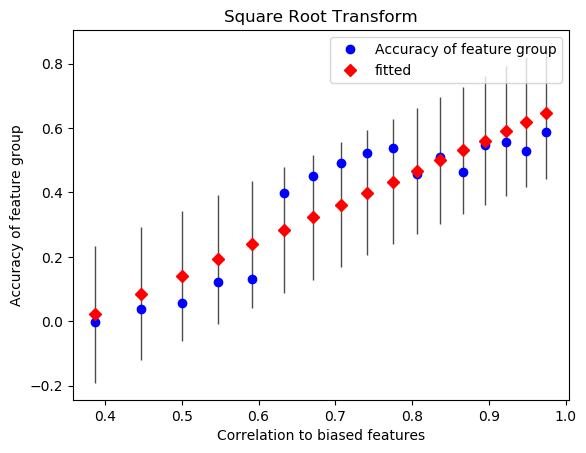

In [33]:
X = np.sqrt(bias_accuracy_tradeoff[['Correlation to biased features']])
X = sm.add_constant(X)
Y = bias_accuracy_tradeoff['Accuracy of feature group']

model = sm.OLS(Y, X).fit()

fig, ax = plt.subplots()
sm.graphics.plot_fit(model, 1, ax=ax)
ax.set_title('Square Root Transform')
plt.show()

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Accuracy of feature group   R-squared:                       0.835
Model:                                   OLS   Adj. R-squared:                  0.824
Method:                        Least Squares   F-statistic:                     75.88
Date:                       Sat, 15 Dec 2018   Prob (F-statistic):           2.97e-07
Time:                               22:13:25   Log-Likelihood:                 18.145
No. Observations:                         17   AIC:                            -32.29
Df Residuals:                             15   BIC:                            -30.62
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.3920      0.091     -4.319      0.001      -0.585      -0.199
Correlation to biased features     1.0660      0.122      8.711      0.000       0.805       1.327
==============================================================================
Omnibus:                        4.099   Durbin-Watson:                   0.696
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                1.961
Skew:                           0.536   Prob(JB):                        0.375
Kurtosis:                       1.728   Cond. No.                         8.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

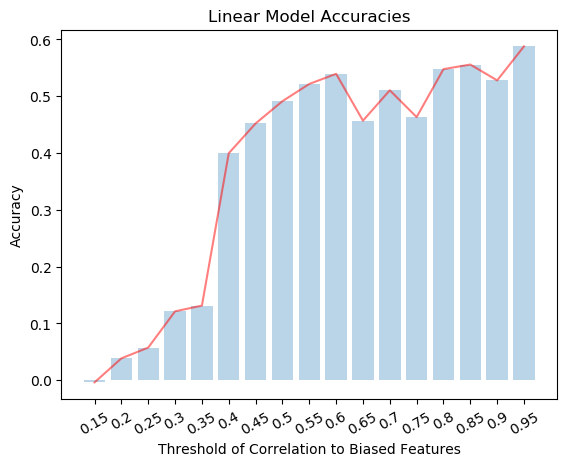

In [35]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
features = tuple(features_correlation_thresholds.keys())
y_pos = np.arange(len(features))
 
plt.bar(y_pos, lm_accuracies.values(), align='center', alpha=0.3)
plt.xticks(y_pos, features)
plt.ylabel('Accuracy')
plt.title('Linear Model Accuracies')
plt.xticks(rotation=30)
plt.xlabel('Threshold of Correlation to Biased Features')
plt.plot(lm_accuracies.values(), color='red', alpha=0.5)
 
plt.show()

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

svm = svm.LinearSVR()
svm_accuracies = []

print('   Support Vector Machine   ')
print('----------------------------')

for name, feature_group in features_correlation_thresholds.items():
    X = df[feature_group]
    print(name)
    scores = cross_val_score(svm, X, y, cv=5)
    print('  Mse: '+str(abs(scores).mean()))
    svm_accuracies.append(abs(scores).mean())

   Support Vector Machine   
----------------------------
0.15
  Mse: 0.784541723334861
0.2
  Mse: 0.6773251758920923
0.25
  Mse: 0.545622459814125
0.3
  Mse: 0.09611510168986356
0.35
  Mse: 0.0927447605861054
0.4
  Mse: 0.16526138004877433
0.45
  Mse: 0.3337588361668483
0.5
  Mse: 0.29327748800699927
0.55
  Mse: 0.399520854091558
0.6
  Mse: 0.2583775616928465
0.65
  Mse: 0.8595309757796954
0.7
  Mse: 0.5223405557482487
0.75
  Mse: 2.121406548250763
0.8
  Mse: 0.9313153652167925
0.85
  Mse: 0.15569637568097233
0.9
  Mse: 2.0634020131662965
0.95
  Mse: 1.5438907905132369


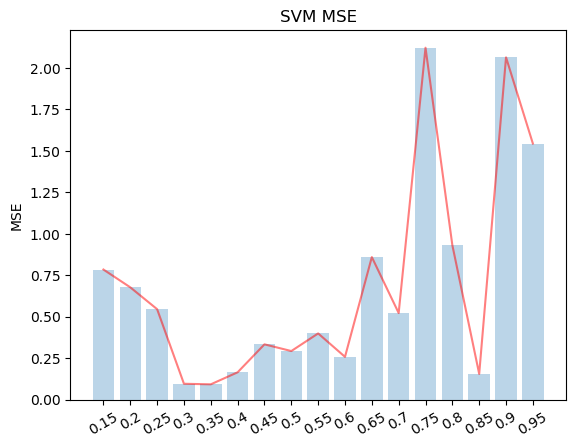

In [37]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
features = tuple(features_correlation_thresholds.keys())
y_pos = np.arange(len(features))
 
plt.bar(y_pos, svm_accuracies, align='center', alpha=0.3)
plt.xticks(y_pos, features)
plt.ylabel('MSE')
plt.title('SVM MSE')
plt.xticks(rotation=30)
plt.plot(svm_accuracies, color='red', alpha =0.5)
 
plt.show()

## Method 3
- Use step-wise regression to determine the best models and their corresponding features
- Pick the model with the least number of biased/protected features

According to stackexchange, stepwise regression may not be the most legimate method for feature selection. After more research, there may or may not be more work into this method

ref: https://stats.stackexchange.com/questions/20836/algorithms-for-automatic-model-selection/20856#20856